kmeans wird gestoppt, falls weniger 1% Änderung des Fehlers
Error: 99.760
Error: 30.560
Error: 0.308


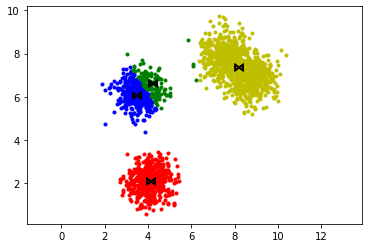

Error: 1056.328
Error: 41.049
Error: 6.304
Error: 2.234
Error: 2.370
Error: 3.284
Error: 3.393
Error: 1.775
Error: 0.978


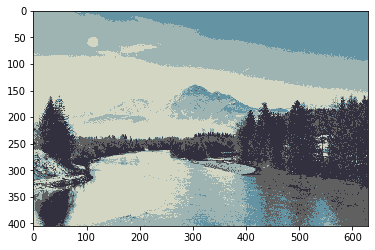

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

# show plot first run
%matplotlib inline 
# test autocompletion with tab or tab+shift
%config IPCompleter.greedy=True 

def distance(a, b):
    """calculates the euclidean distance"""
    #return np.sqrt(np.sum((a-b)**2)) #
    #return (((a[0] - b[0]) ** 2) + ((a[1] - b[1]) ** 2) + ((a[2] - b[2]) ** 2) ) ** 0.5  # fast sqrt
    # ubyte error forces typecast of image pixels to int!!!! 
    return np.linalg.norm(a-b)
    

def plot_clusters(points, centers, indices):
    """plots the clusters"""
    cluster_colors = ['r', 'b', 'y', 'g', 'm', 'c','k']
    plt.clf()
    plt.axis('equal')
    plt.ion()
    for i in range(len(centers)):
        # Plotting the clusters
        plt.plot(*zip(*points[indices == i]),  marker='.', color=cluster_colors[i], ls='')
        # Plotting cluster centers
        plt.plot(centers[i][0], centers[i][1],  marker=r'$\bowtie$', color='k', markersize=10)
        
    plt.savefig('ex05_kmeans_2dpoints.png')
    plt.pause(1)
    plt.show()


def initialize(points, k):
    """
    Initialize k-means by returning k cluster centers. The cluster centers are
    random sample points.

    :param points: ndarray with shape (N,d) containing datasetpoints, where
                   N is number of points and d is the dimension of the points.
    :param k: number of cluster centers.
    :return: ndarray with shape(k,d) containing the random cluster centers
    """
    # 1.1 Initializieren Sie das cluster center ndarray
    centers = np.zeros((k, points.shape[1]), np.float32)
    
    # 1.2 Pro cluster center (k) wähle einen zufälligen Punkt als cluster center
    # select k different indice samples, always not equal to each other 
    idx_samples = random.sample(range(0, points.shape[0]), k)
    #print('idx',idx_samples)
    #print('pointssel',points[idx_samples,:])
    
    # select centers from points
    centers = points[idx_samples,:]
    #print('centers',centers)
    
    # 1.3 Returnen Sie die cluster center
    return centers


def assign_to_center(points, centers):
    """
    Assigns each data point to its nearest cluster center (the smallest eucledian distance).
    The function returns the indices and the overall_distance,
    such that the nearest cluster center of point[i] is centers[indices[i]]
    (The overall distance can be used as a measure of global change.)

    :param points: ndarray with shape (N,d) containing datasetpoints, where
                   N is number of points and d is the dimension of the points.
    :param centers: ndarray with shape (k,d) containing the current cluster centers,
                    where k is the number of cluster and d the dimension of the points.
    :return: indices and overall_distance
    """
    
    # YOUR CODE HERE
    indices = np.zeros((points.shape[0]),dtype=int)
    numclusters = centers.shape[0]
    overall_dist = 0
    tmp = np.zeros((numclusters),dtype=float)
    
    for r in range(points.shape[0]):
        for k in range(numclusters):
            tmp[k] = distance(centers[k,:], points[r,:])
        
        indices[r] = np.argmin(tmp)
        overall_dist += np.min(tmp)
        
    # 2.1.2 Returnen Sie die Indices sowie die Summe der Abstände
    return indices, overall_dist


def update_centers(points, centers, indices):
    """
    Updates the cluster centers depending on the point assignment (indices).
    The new cluster center is the mean of all points belonging to this cluster center.

    :param points: ndarray with shape (N,d) containing datasetpoints, where
                   N is number of points and d is the dimension of the points.
    :param centers: ndarray with shape (k,d) containing the current cluster centers,
                    where k is the number of cluster and d the dimension of the points.
    :param indices: ndarray with shape (N) containing the index of the cluster
                    center for every point.
    :return: new cluster centers
    """
    # 2.2.1 Updaten Sie die cluster centers mit dem Durchschnittspunkt in jedem Cluster
    tmp = []
    for n in range(centers.shape[0]):
        tmp = points[indices==n,:] # fancy indexing
        centers[n] = np.mean(tmp,axis=0)
  
    return centers



def k_means(points, k, iterations=10):
    """
    Assigns each data point to its nearest cluster center (the smallest eucledian distance).
    The function returns the indices and the overall_distance,
    such that the nearest cluster center of point[i] is centers[indices[i]]
    (The overall distance can be used as a measure of global change.)

    :param points: ndarray with shape (N,d) containing datasetpoints, where
                   N is number of points and d is the dimension of the points.
    :param k: number of cluster centers.
    :param iterations: number of k-means iterations.
    :return: cluster centers und indices
    """
    #print('point size',points.shape)
    #points = points.astype(int)
    
    
    # 1. Initializieren Sie die cluster centers und die indices.
    # initialize current cluster centers (i.e. the pixels that represent a cluster center)
    centers = []
    #print ('centers shape',centers.shape)    
    indices = []
    #print ('indices shape',indices.shape)
    
    # Implementieren Sie dazu die Funktion initialize
    centers = initialize(points, k)
    
    # 2. Pro iteration:
    distance_old = 1000000.0
    distance_new = 0.0
    for i in range(iterations):
        
        # 2.1 Weisen Sie den Punkten die jeweiligen cluster center zu
        # Implementieren Sie dazu die Funktion assign_to_center
        indices, distance_new = assign_to_center(points, centers)
        #print(indices, distance)
        
        # 2.2 Aktualisieren Sie die neuen cluster center anhand der berechneten indices.
        # Implementieren Sie dazu die Funktion update_centers
        #print('old_centers', centers)
        centers2 = update_centers(points, centers, indices)
        centers = centers2
        #print('new centers',centers)
        
        # 2.3 (optional) Plotten Sie die cluster und Datenpunkte mittels plot_clusters
        #plot_clusters(points, centers, indices)

        # 2.4 (optional) Brechen Sie die Schleife vorzeitig ab sollten sich die
        # Distanz zu den cluster centern kaum noch verändert haben
        percent = 100*(np.abs(distance_old - distance_new)) / distance_old
        print('Error: {0:.3f}'.format(percent))
        
        if percent < 1:
            break
            
        distance_old = distance_new
    
    # 3. Return cluster centers und indices
    return centers, indices


# ---------------------------------------------------------------------------
# k-means Beispielaufrufe (Hier unten ist alles funktionstüchtig)
# Lesen Sie sich den Bereich dennoch durch.
# ---------------------------------------------------------------------------
if __name__ == "__main__":
    # Initializierung
    num_clusters_2d = 4
    num_clusters_3d = 5
    num_iter = 20

    print('kmeans wird gestoppt, falls weniger 1% Änderung des Fehlers')
    
    # Laden der Datenpunkte
    points = np.loadtxt('kmeans_points.txt')
    # Aufrufen von k-means mit den Datenpunkten
    # TODO: Implementieren Sie k_means:
    centers, indices = k_means(points, num_clusters_2d, num_iter)
    # Plotten des Ergebnisses
    plot_clusters(points, centers, indices)

    
    # Wenn k-means funktionstüchtig ist, kann dieser Bereich einkommentiert werden
    # Mit diesm Beispielcode kann in einem Bild die Anzahl der Farben reduziert
    # werden (nötig um ein z.B. ein gif Bild zu generieren):
    img = plt.imread("images/landscape_small.jpg").copy()
    
    # if no cast, eclidien distance error!!!!
    img = img.astype(int)
    
    cc, ci = k_means(img.reshape(-1,3), num_clusters_3d, num_iter)
    for i in range(len(cc)):
        map = ci.reshape(img.shape[:2])
        img[map == i,:] = cc[i]
    
    plt.imshow(img)
    plt.savefig('ex05_kmeans_colorquant.png', bbox_inches='tight')
    plt.show()
